### 라이브러리 불러오기

In [1]:
import requests
from bs4 import BeautifulSoup
import re
from konlpy.tag import Okt
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud


url = "https://news.daum.net/"
headers = {"User-Agent": "Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36"}

html = requests.get(url, headers=headers)
soup = BeautifulSoup(html.content, 'html.parser')
news_block = soup.find(class_="box_g box_news_issue")
news_main = news_block.find_all(class_="tit_g")

news_block_len = len(news_main)

news_content_link = []
news_content_headline = []

for i in range(news_block_len):
    link_element = news_main[i].find('a', class_='link_txt')
    if link_element and 'href' in link_element.attrs:
        news_content_link.append(link_element['href'])
    else:
        news_content_link.append("N/A")  
        
    # 기사 제목을 추출합니다.
    headline_element = news_main[i].find('a')
    if headline_element:
        news_content_headline.append(headline_element.text)
    else:
        news_content_headline.append("N/A")  # 기사 제목을 찾을 수 없는 경우 처리

cleaned_data = []
for item in news_content_headline:
    # 공백 제거 및 제목 부분 추출
    cleaned_item = re.sub(r'\n\s*', '', item.strip())
    cleaned_data.append(cleaned_item)

# 가져온 내용 출력
print(f'가져온 뉴스의 해드라인은 {news_block_len}개 입니다')
for i in range(news_block_len):
    print(f"{i+1} 기사 제목: {cleaned_data[i]}")
    print(f"링크: {news_content_link[i]}")


가져온 뉴스의 해드라인은 20개 입니다
1 기사 제목: 교원 상대 아동학대 고소 늘지만… 실제 처벌 1.2%대 [송민섭의 통계로 본 교육]
링크: https://v.daum.net/v/20230917194249983
2 기사 제목: 소녀상 뺏긴 카셀대 학생들 "내가 소녀상이다" 가면시위
링크: https://v.daum.net/v/20230918000949325
3 기사 제목: 美 설리번·中 왕이 몰타서 회동…"솔직하고 건설적 대화"(종합2보)
링크: https://v.daum.net/v/20230918000824317
4 기사 제목: 통계조작으로 감춘 부동산·소주성 실패 논란…文은 몰랐을까 [정국 기상대]
링크: https://v.daum.net/v/20230918000000122
5 기사 제목: 유인촌 '참여정부 인사 사퇴 압박' 불기소…고발 6개월 만에
링크: https://v.daum.net/v/20230918000045151
6 기사 제목: [동전주⑱] '테마주계 단골' 보해양조, 수년째 동전주 못 벗어나는 이유
링크: https://v.daum.net/v/20230918000102156
7 기사 제목: 가야 고분, 세계유산 등재 10년 노력, “만세” 감격
링크: https://v.daum.net/v/20230917233923072
8 기사 제목: 정유라, 이재명 단식장 앞 野 인사들에 “유산 받으러온 자식들” 비난
링크: https://v.daum.net/v/20230917234505087
9 기사 제목: ‘위키트리’ 주식 팔았다던 김행, 남편 주식은 시누이에 꼼수 매각
링크: https://v.daum.net/v/20230917211010799
10 기사 제목: 유커가 몰려온다…항공업계, 중추절 대목 앞두고 ‘증편 경쟁’
링크: https://v.daum.net/v/20230917213826123
11 기사 제목: 이균용 후보자 "법의 지배 실현 이룰 강한 신념과 추진력 있어야"
링크: https://v.daum.net/v/202309172311

['교사', '노동조합', '공개', '대전', '초등학교', '사망', '교사', '교권', '침해', '사례', '설문조사', '응답', '목', '대가', '교직', '몸', '년', '고인', '서울', '이초', '교사', '사망', '소식', '접', '뒤', '그', '학생', '약', '년', '시간', '후', '교사', '로서', '무기', '함', '교사', '대한', '자긍심', '등', '우울증', '약', '지난', '년', '세월', '동안', '공포', '하루', '종일', '기만']


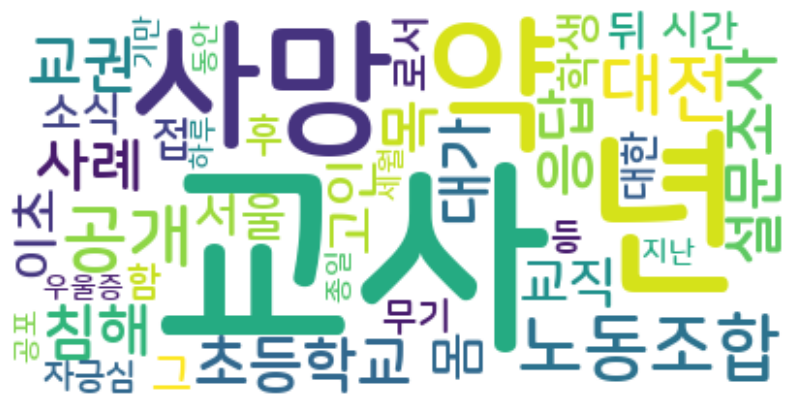

['아이', '태도', '이후', '것', '친구', '또', '고월', '발', '차고', '월', '뺨', '월', '더', '이상', '지도', '수', '교장', '실로', '학부모', '다음', '날', '교무', '실로', '아이', '마음', '상처', '사과', '요구', '거부', '부모', '월일', '아동학대', '건', '신고', '고인', '교권', '보호', '위원회', '소집', '요청']


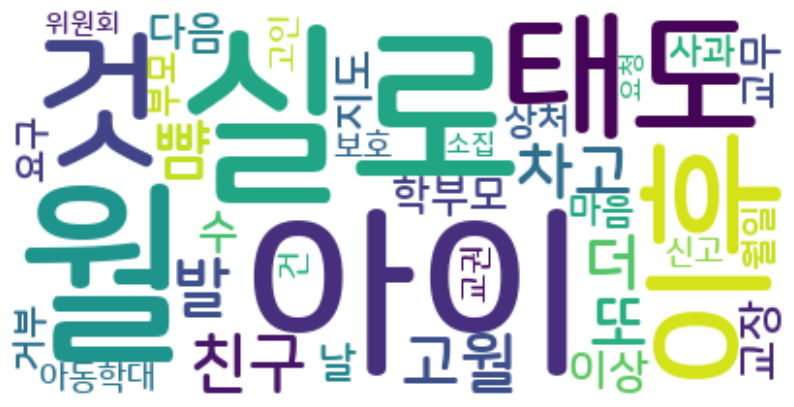

['지난해', '아동학대', '판단', '건수', '중', '고소', '고발', '등', '검', '경의', '수사', '등', '진행', '사건', '중', '아동학대', '혐의', '입증', '형사', '처벌', '경우', '얼마나', '요', '고작', '인', '건', '교사', '주로', '피소', '정서', '학대', '요', '정서', '학대', '판단', '건수', '년', '건', '년', '건', '건', '급증', '관련', '유죄', '율', '역시', '전체', '건의', '인', '건']


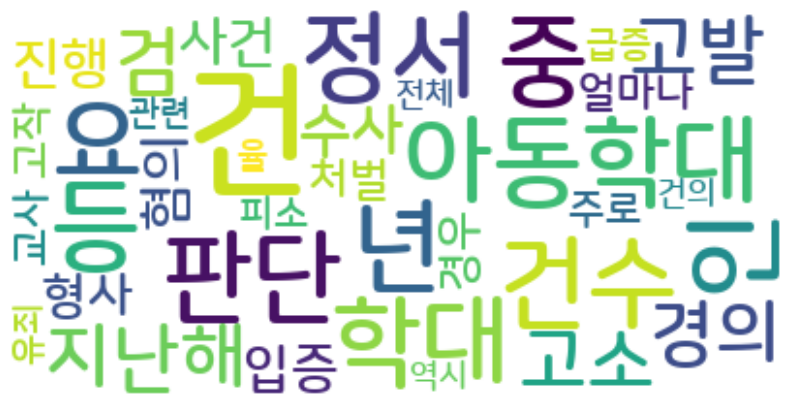

['국회', '교육', '위원회', '초', '중등교육', '법', '교원', '위법', '등', '교권', '보호', '개법', '개정', '논의', '진행', '학부모', '지속', '악성', '민원', '무분별', '아동학대', '신고', '위해', '교사', '학생', '생활', '지도', '대해', '정서', '학대', '행위', '제외', '내용', '일', '국회', '본회의', '통과', '목표', '교육청', '내', '아동학대', '사례', '판단', '위원회', '설치', '등', '여야', '간', '이견', '국회', '본회의', '상정이', '무산']


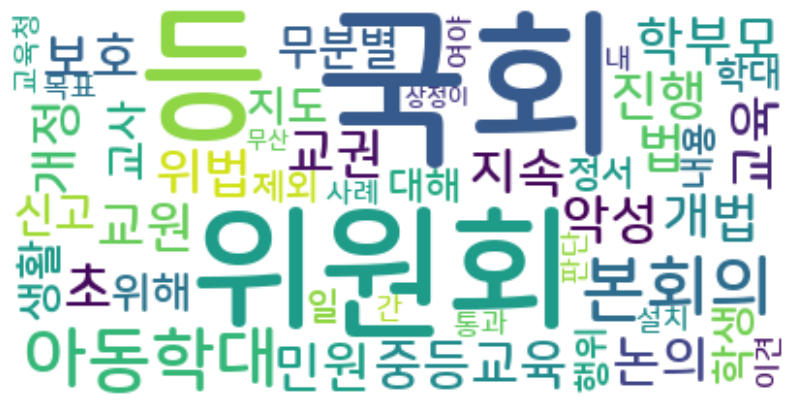

['베를린', '연합뉴스', '이율', '특파원', '독일', '카셀', '주립대', '총학생회', '주도', '평화', '소녀', '누진', '기습', '철거', '카셀', '학생', '시민', '내', '누진', '누진', '구하라', '면서', '소녀', '가면', '시위', '눈길']


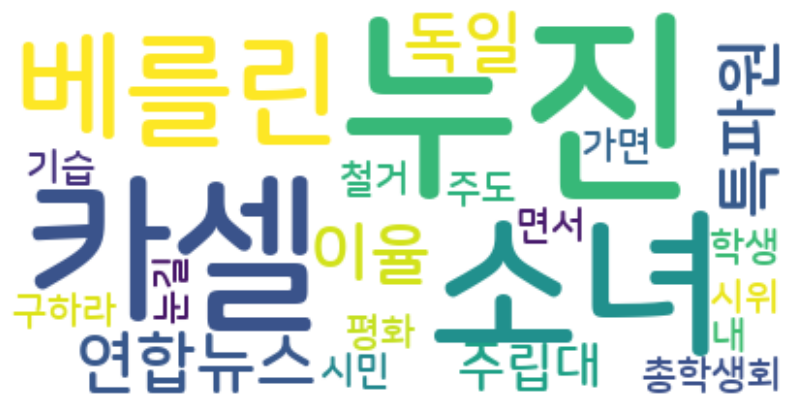

['지난', '시간', '독일', '카셀', '중앙', '역', '앞', '카셀', '시가', '주최', '시민', '축제', '박물관', '밤', '날', '카셀', '학생', '시민', '여명', '소녀', '가면', '줄']


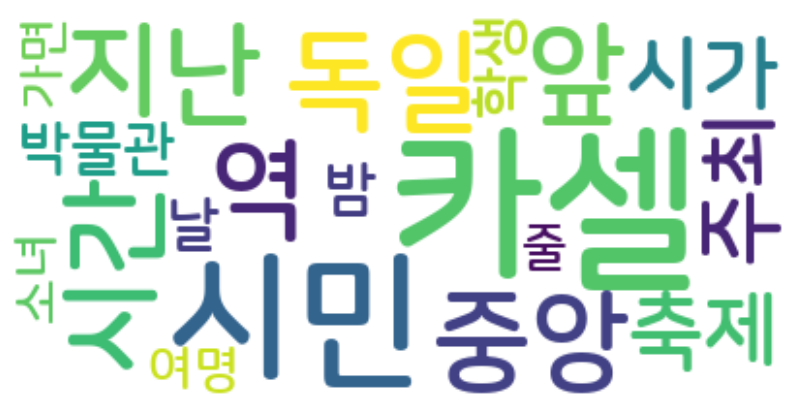

['누진', '어디', '누진', '구하라', '티셔츠', '내용', '피켓', '누진', '구하라', '거듭']


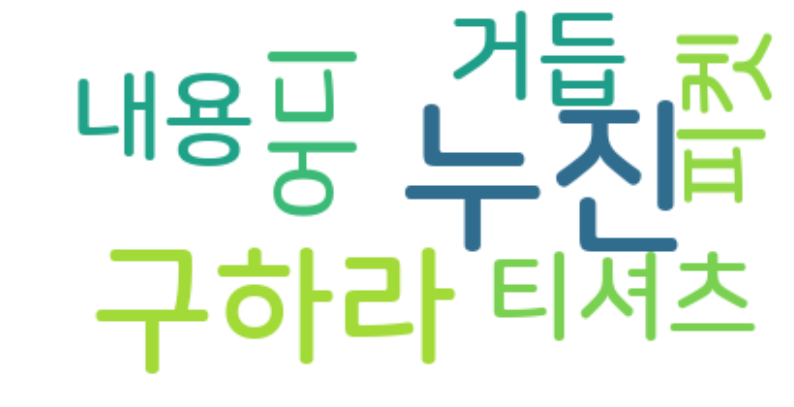

['평화', '소녀', '위해', '스스로', '소녀', '분한', '중앙', '역', '시작', '쾨', '히스', '라츠', '시청', '등', '시간', '동안', '도심', '행진', '게릴라', '퍼포먼스']


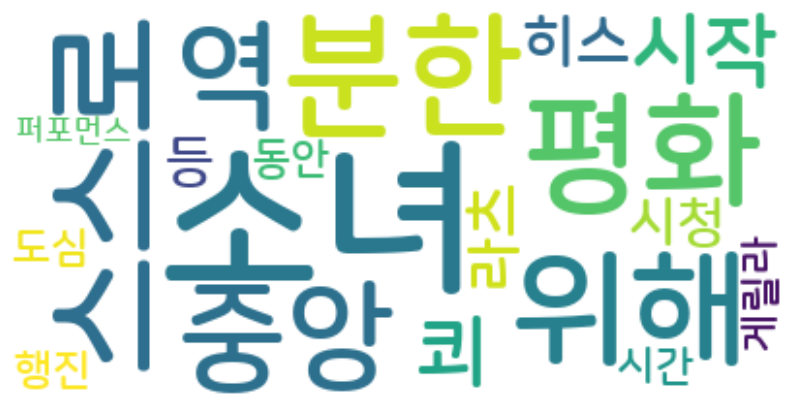

['이번', '행사', '기획', '카셀', '미대', '연합뉴스', '전화통화', '카셀', '학생', '세운', '평화', '소녀', '상이', '기습', '철거', '충격', '미대', '내', '소녀', '관', '워크숍', '진행', '설명']


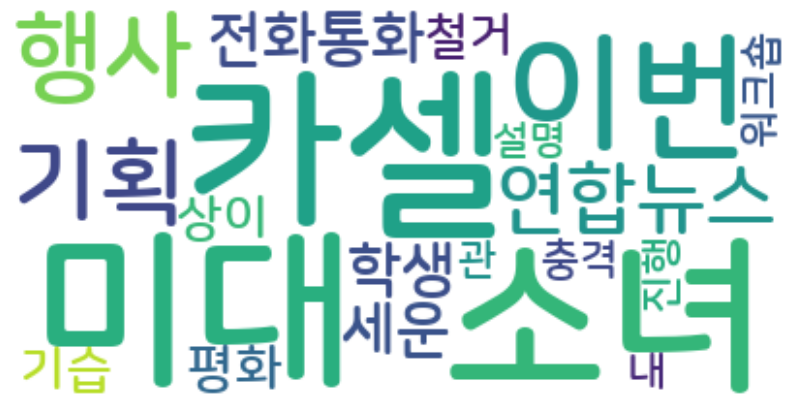

['퍼포먼스', '워크숍', '참여', '학생', '총학생회', '수요일', '소녀', '누진', '자리', '집회', '시민', '재', '모두', '참여', '말']


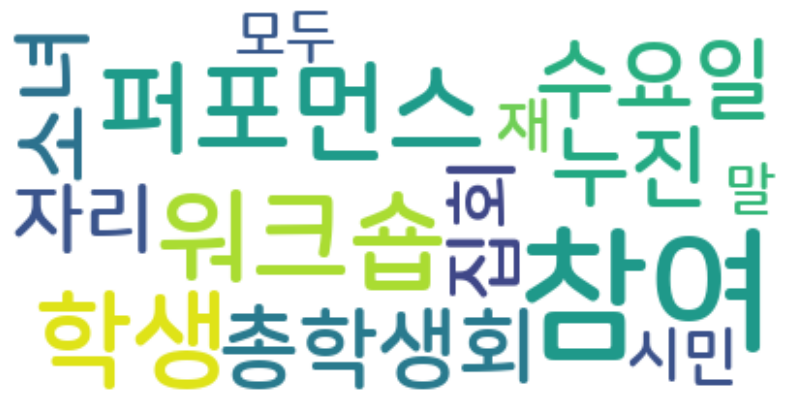

['카셀', '졸업생', '이단', '작가', '워크숍', '브이포벤데타', '브이', '가면', '소녀', '분할', '것', '제안', '참가자', '소녀', '상의', '모습', '종이', '가면', '제작', '착용']


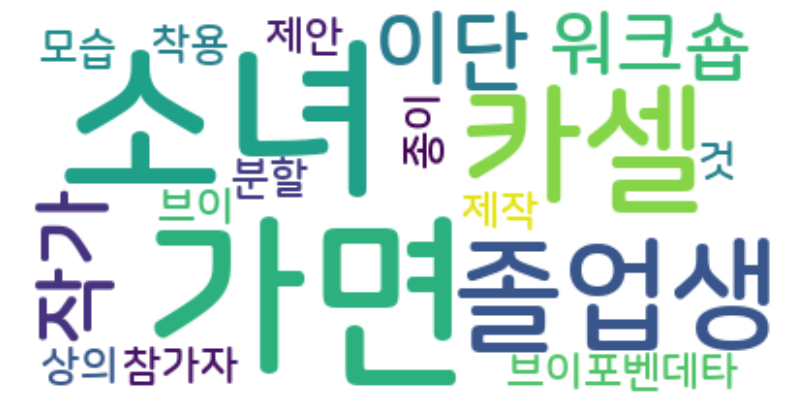

['이단', '작가', '평화', '소녀', '상이', '기습', '철거', '화제', '우리', '모두', '소녀', '것', '참여', '함', '정보', '확대', '수', '퍼포먼스', '기획', '말']


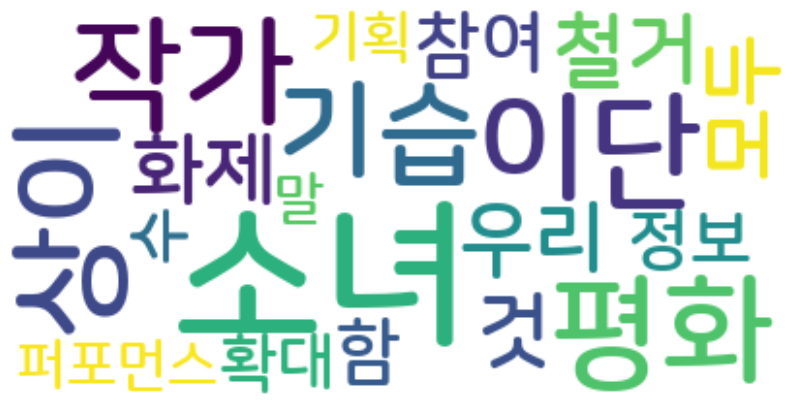

['카셀', '학생', '앞', '학교', '안팎', '여러', '형태', '게릴라', '퍼포먼스', '워크숍', '말미', '각자', '작업', '관련', '작품', '전시', '계획']


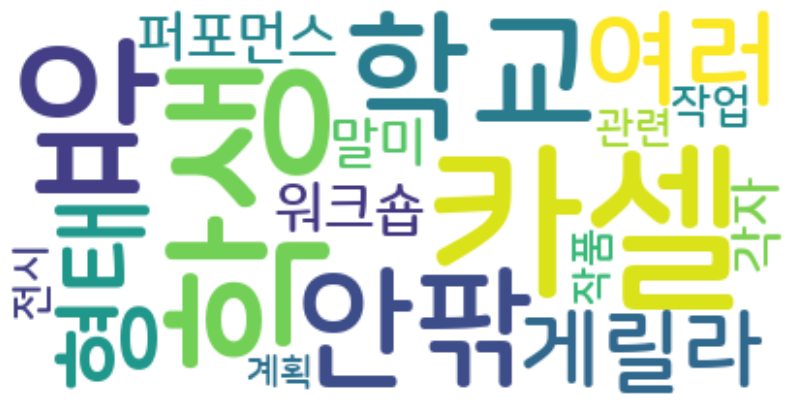

['시민', '퍼포먼스', '보더', '걷기', '가면', '달라', '무슨', '이야기', '설명', '학교', '측', '조처', '이해', '공감', '힘', '소녀', '통해', '한국', '역사', '지금', '우크라이나', '아프가니스탄', '등', '여성', '상대로', '전쟁범죄', '대해', '알리', '말']


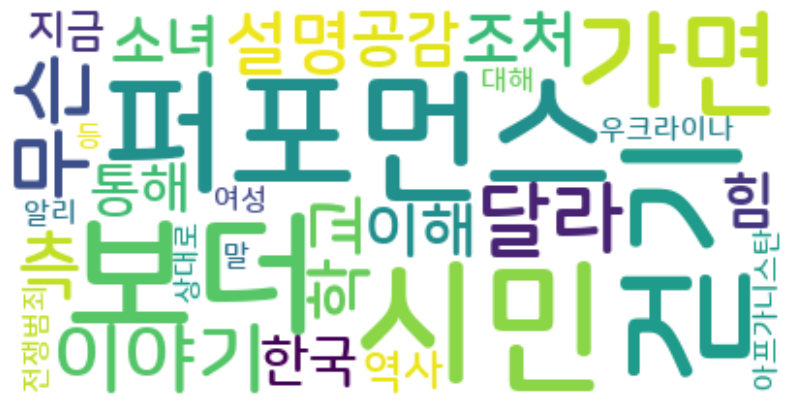

['카셀', '총학생회', '지난해', '월', '세계', '국제', '현대', '미술', '전시회', '카셀', '도큐', '멘타', '동반', '총학생회', '본관', '앞', '신축', '공원', '평화', '소녀', '설치', '독일', '대학', '캠퍼스', '내', '첫', '설치', '사례', '총학생회', '위해', '학생', '의회', '소녀', '영구', '존치', '결의', '안', '통과', '부지', '사용', '대해', '대학', '측', '허가']


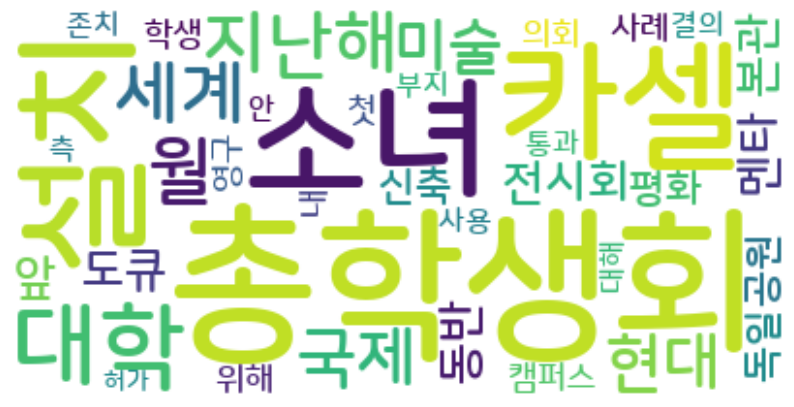

['카셀', '측은', '이후', '도큐', '멘타', '전시', '허가', '기간', '만료', '이유', '소녀', '상의', '철거', '요구', '학생', '거부', '지난', '월', '일', '예고', '소녀', '기습', '철거']


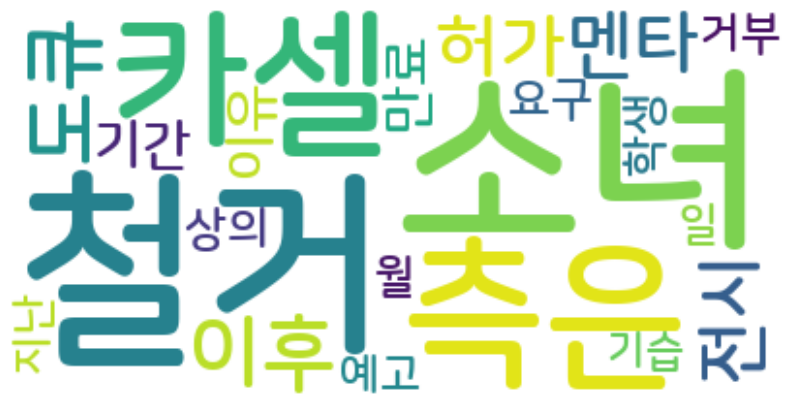

[]


ValueError: We need at least 1 word to plot a word cloud, got 0.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd


headers = {"User-Agent": "Mozilla/5.0 (Windows NT 6.3; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/44.0.2403.157 Safari/537.36"}
all_news = []

for news in news_content_link:
    html = requests.get(news, headers=headers)
    soup = BeautifulSoup(html.content, 'html.parser')
    for p in soup.find_all('p', {'dmcf-ptype': 'general'}):
        extracted_text = p.get_text()

        ################정규식을 사용하여 특수 문자 및 숫자 제거
        text_data = re.sub(r"[^ㄱ-ㅎㅏ-ㅣ가-힣\s]", "", extracted_text)

        ################형태소 분석을 위해 Konlpy 라이브러리의 Okt 클래스 사용
        okt = Okt()
        tokens = okt.nouns(text_data)
        #############불용어 제외
        stopwords = ["을", "를", "이", "가", "은", "는", "의"]
        filtered_tokens = [word for word in tokens if word not in stopwords]
        print(filtered_tokens)
        # ################단어 빈도수 카운트
        word_counts = Counter(filtered_tokens)

        wordcloud = WordCloud(font_path="Data preprocessing(2주차))/NanumSquareRoundB.ttf", background_color='white').generate_from_frequencies(word_counts)

        # #####################워드 클라우드 시각화
        plt.figure(figsize=(10, 8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis("off")
        plt.show()







